In [3]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
def group_mean_log_mae(y_true, y_pred, groups, floor=1e-9):
    maes = (y_true-y_pred).abs().groupby(groups).mean()
    return np.log(maes.map(lambda x: max(x, floor))).mean()

In [4]:
tracking = pd.read_csv('../tracking/tracking.csv')

## 1JHC

In [91]:
# M031
# M032
# M030
tracking.sort_values('1JHC_mae_cv')[['run_id','model_number','1JHC_mae_cv']].head(8)

,run_id,model_number,1JHC_mae_cv
22,0702_0822,M031,0.5793
24,0703_2133,M032,0.6068
19,0701_1300,M030,0.6196
21,0701_1304,M030,0.6211
20,0701_1302,M030,0.6211
17,0630_1258,M028,0.6569
18,0701_0819,M029,0.6583
16,0629_2221,M027,0.6594


In [92]:
oofM031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_oof_lgb_3folds_5000000iter_0.05lr.csv')
oofM032 = pd.read_csv('../temp/M032/temp7of8_M032_0703_2133_oof_lgb_3folds_5000000iter_0.1lr.csv')
oofM030a = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_oof_lgb_3folds_5000000iter_0.05lr.csv')
oofM030b = pd.read_csv('../temp/M030/temp4of8_M030_0701_1304_oof_lgb_3folds_5000000iter_0.05lr.csv')
oofM030c = pd.read_csv('../temp/M030/temp4of8_M030_0701_1300_oof_lgb_3folds_5000000iter_0.05lr.csv')

In [93]:
oofM030['oof_preds'] = (oofM030a['oof_preds'] + oofM030b['oof_preds'] + oofM030c['oof_preds'])

In [94]:
oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM030['oof_preds'] + oofM031['oof_preds'] + oofM032['oof_preds']) / 3
oof_final.loc[oof_final['type'] == '1JHC', 'oof_preds'] = temp.loc[oof_final['type'] == '1JHC']

In [95]:
mean_absolute_error(oof_final.loc[oof_final['type'] == '1JHC']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '1JHC']['oof_preds'])

0.5585689312945809

# 2JHH

In [96]:
tracking.sort_values('2JHH_mae_cv')[['run_id','model_number','model_type','2JHH_mae_cv']].head(8)

,run_id,model_number,model_type,2JHH_mae_cv
22,0702_0822,M031,catboost,0.1543
23,0703_1733,M032,catboost,0.1614
24,0703_2133,M032,catboost,0.1615
19,0701_1300,M030,lgbm,0.1639
13,0629_1311,M025,catboost,0.1640
20,0701_1302,M030,lgbm,0.1641
21,0701_1304,M030,lgbm,0.1659
33,0704_2344,M035,lgbm,0.1704


In [97]:
oofM025 = pd.read_csv('../oof/M025_0629_1311_oof_lgb_2folds_-1.3265CV_500000iter_0.1lr.csv')
oofM031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_oof_lgb_3folds_5000000iter_0.05lr.csv')
oofM032 = pd.read_csv('../temp/M032/temp7of8_M032_0703_2133_oof_lgb_3folds_5000000iter_0.1lr.csv')
oofM030a = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_oof_lgb_3folds_5000000iter_0.05lr.csv')
oofM030b = pd.read_csv('../temp/M030/temp4of8_M030_0701_1304_oof_lgb_3folds_5000000iter_0.05lr.csv')
oofM030c = pd.read_csv('../temp/M030/temp4of8_M030_0701_1300_oof_lgb_3folds_5000000iter_0.05lr.csv')
oofM030['oof_preds'] = (oofM030a['oof_preds'] + oofM030b['oof_preds'] + oofM030c['oof_preds'])

In [98]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM030['oof_preds'] + oofM031['oof_preds'] + oofM032['oof_preds'] + oofM025['oof_preds']) / 4
oof_final.loc[oof_final['type'] == '2JHH', 'oof_preds'] = temp.loc[oof_final['type'] == '2JHH']

In [99]:
mean_absolute_error(oof_final.loc[oof_final['type'] == '2JHH']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '2JHH']['oof_preds'])

0.14141356382524184

# 1JHN_mae_cv

In [100]:
tracking.sort_values('1JHN_mae_cv')[['run_id','model_number','model_type','1JHN_mae_cv']].head(8)

,run_id,model_number,model_type,1JHN_mae_cv
21,0701_1304,M030,lgbm,0.3504
19,0701_1300,M030,lgbm,0.3609
20,0701_1302,M030,lgbm,0.3632
33,0704_2344,M035,lgbm,0.3846
12,0627_1434,M024,lgbm,0.3909
32,0704_2337,M035,lgbm,0.3973
18,0701_0819,M029,catboost,0.4007
15,0629_1638,M026,lgbm,0.4063


In [101]:
oofM035 = pd.read_csv('../temp/M035/temp3of8_M035_0704_2344_oof_lgbm_2folds_500000iter_0.01lr.csv')
oofM024 = pd.read_csv('../oof/M024_0627_1434_oof_lgb_2folds_-1.2826CV_500000iter_0.1lr.csv')
oofM029 = pd.read_csv('../oof/M029_0701_0819_oof_lgb_2folds_-1.2437CV_5000000iter_0.1lr.csv')
oofM026 = pd.read_csv('../oof/M026_COMBINED_oof_lgb_2folds_-1.2198CV_500000iter_0.1lr.csv')

In [102]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM030['oof_preds'] + oofM035['oof_preds'] + oofM024['oof_preds'] + oofM029['oof_preds']) / 4
oof_final.loc[oof_final['type'] == '1JHN', 'oof_preds'] = temp.loc[oof_final['type'] == '1JHN']
mean_absolute_error(oof_final.loc[oof_final['type'] == '1JHN']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '1JHN']['oof_preds'])

0.33390003595789225

# 2JHN_mae_cv

In [103]:
tracking.sort_values('2JHN_mae_cv')[['run_id','model_number','model_type','2JHN_mae_cv']].head(8)

,run_id,model_number,model_type,2JHN_mae_cv
22,0702_0822,M031,catboost,0.1300
20,0701_1302,M030,lgbm,0.1391
19,0701_1300,M030,lgbm,0.1396
13,0629_1311,M025,catboost,0.1398
21,0701_1304,M030,lgbm,0.1402
24,0703_2133,M032,catboost,0.1406
40,0705_2317,M036,catboost,0.1454
12,0627_1434,M024,lgbm,0.1478


In [104]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM031['oof_preds'] + oofM030['oof_preds'] + oofM025['oof_preds'] + oofM032['oof_preds']) / 4
oof_final.loc[oof_final['type'] == '2JHN', 'oof_preds'] = temp.loc[oof_final['type'] == '2JHN']
mean_absolute_error(oof_final.loc[oof_final['type'] == '2JHN']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '2JHN']['oof_preds'])

0.11982119253201608

# 2JHC_mae_cv

In [105]:
tracking.sort_values('2JHC_mae_cv')[['run_id','model_number','model_type','2JHC_mae_cv']].head(8)

,run_id,model_number,model_type,2JHC_mae_cv
24,0703_2133,M032,catboost,0.2866
13,0629_1311,M025,catboost,0.3002
16,0629_2221,M027,catboost,0.3143
17,0630_1258,M028,catboost,0.3145
12,0627_1434,M024,lgbm,0.3198
18,0701_0819,M029,catboost,0.3309
15,0629_1638,M026,lgbm,0.3340
30,0704_1133,M033,lgbm,0.3342


In [106]:
oofM027 = pd.read_csv('../oof/M027_0629_2221_oof_lgb_2folds_-1.2683CV_500000iter_0.1lr.csv')
oofM028 = pd.read_csv('../oof/M028_0630_1258_oof_lgb_2folds_-1.2487CV_5000000iter_0.1lr.csv')

In [107]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM032['oof_preds'] + oofM025['oof_preds'] + oofM027['oof_preds'] + oofM028['oof_preds'] + oofM024['oof_preds']) / 5
oof_final.loc[oof_final['type'] == '2JHC', 'oof_preds'] = temp.loc[oof_final['type'] == '2JHC']
mean_absolute_error(oof_final.loc[oof_final['type'] == '2JHC']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '2JHC']['oof_preds'])

0.2705931232613277

# 3JHH_mae_cv

In [108]:
tracking.sort_values('3JHH_mae_cv')[['run_id','model_number','model_type','3JHH_mae_cv']].head(8)

,run_id,model_number,model_type,3JHH_mae_cv
13,0629_1311,M025,catboost,0.1934
24,0703_2133,M032,catboost,0.1990
12,0627_1434,M024,lgbm,0.2082
16,0629_2221,M027,catboost,0.2135
17,0630_1258,M028,catboost,0.2143
18,0701_0819,M029,catboost,0.2280
15,0629_1638,M026,lgbm,0.2283
14,0629_1637,M026,lgbm,0.2307


In [109]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM025['oof_preds'] + oofM032['oof_preds'] + oofM024['oof_preds'] + oofM027['oof_preds'] + oofM028['oof_preds']) / 5
oof_final.loc[oof_final['type'] == '3JHH', 'oof_preds'] = temp.loc[oof_final['type'] == '3JHH']
mean_absolute_error(oof_final.loc[oof_final['type'] == '3JHH']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '3JHH']['oof_preds'])

0.17763778987058434

# 3JHC
3JHN_mae_cv

In [110]:
tracking.sort_values('3JHC_mae_cv')[['run_id','model_number','model_type','3JHC_mae_cv']].head(8)

,run_id,model_number,model_type,3JHC_mae_cv
24,0703_2133,M032,catboost,0.3838
13,0629_1311,M025,catboost,0.3905
16,0629_2221,M027,catboost,0.4148
17,0630_1258,M028,catboost,0.4156
12,0627_1434,M024,lgbm,0.4221
15,0629_1638,M026,lgbm,0.4451
14,0629_1637,M026,lgbm,0.4453
18,0701_0819,M029,catboost,0.4490


In [111]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM032['oof_preds'] + oofM025['oof_preds'] + oofM027['oof_preds'] + oofM028['oof_preds'] + oofM024['oof_preds'] + oofM026['oof']) / 6
oof_final.loc[oof_final['type'] == '3JHC', 'oof_preds'] = temp.loc[oof_final['type'] == '3JHC']
mean_absolute_error(oof_final.loc[oof_final['type'] == '3JHC']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '3JHC']['oof_preds'])

0.3597301362805249

# 3JHN_mae_cv

In [112]:
tracking.sort_values('3JHN_mae_cv')[['run_id','model_number','model_type','3JHN_mae_cv']].head(8)

,run_id,model_number,model_type,3JHN_mae_cv
13,0629_1311,M025,catboost,0.1627
24,0703_2133,M032,catboost,0.1647
12,0627_1434,M024,lgbm,0.1750
17,0630_1258,M028,catboost,0.1782
16,0629_2221,M027,catboost,0.1786
14,0629_1637,M026,lgbm,0.1890
18,0701_0819,M029,catboost,0.1911
15,0629_1638,M026,lgbm,0.1920


In [113]:
#oof_final = oofM031[['id','type','scalar_coupling_constant','oof_preds']].copy()
temp = (oofM025['oof_preds'] + oofM024['oof_preds'] + oofM028['oof_preds'] + oofM027['oof_preds'] + oofM026['oof']) / 5
oof_final.loc[oof_final['type'] == '3JHN', 'oof_preds'] = temp.loc[oof_final['type'] == '3JHN']
mean_absolute_error(oof_final.loc[oof_final['type'] == '3JHN']['scalar_coupling_constant'],
                    oof_final.loc[oof_final['type'] == '3JHN']['oof_preds'])

0.15824777887814534

# OVERALL OOF SCORE

In [26]:
for i, d in oof_final.groupby('type'):
    print(i)
    print(mean_absolute_error(d['scalar_coupling_constant'], d['oof_preds']))

NameError: name 'oof_final' is not defined

In [118]:
group_mean_log_mae(oof_final['scalar_coupling_constant'], oof_final['oof_preds'], oof_final['type'])

-1.4572817819051431

# Read Submission files

In [6]:
test = pd.read_csv('../input/test.csv')

In [7]:
test.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [8]:
ss = test[['id','type']].copy()
ss['scalar_coupling_constant'] = 0

In [19]:
subM024 = pd.read_csv('../submissions/M024_0627_1434_submission_lgb_2folds_-1.2826CV_500000iter_0.1lr.csv')
subM025 = pd.read_csv('../submissions/M025_0629_1311_submission_lgb_2folds_-1.3265CV_500000iter_0.1lr.csv')
subM026 = pd.read_csv('../submissions/M026_COMBINED_submission_lgb_2folds_-1.2198CV_500000iter_0.1lr.csv')
subM027 = pd.read_csv('../submissions/M027_0629_2221_submission_lgb_2folds_-1.2683CV_500000iter_0.1lr.csv')
subM028 = pd.read_csv('../submissions/M028_0630_1258_submission_lgb_2folds_-1.2487CV_5000000iter_0.1lr.csv')
subM029 = pd.read_csv('../submissions/M029_0701_0819_submission_lgb_2folds_-1.2437CV_5000000iter_0.1lr.csv')
subM030a = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_submission_lgb_3folds_5000000iter_0.05lr.csv')
subM030b = pd.read_csv('../temp/M030/temp4of8_M030_0701_1304_submission_lgb_3folds_5000000iter_0.05lr.csv')
subM030c = pd.read_csv('../temp/M030/temp4of8_M030_0701_1300_submission_lgb_3folds_5000000iter_0.05lr.csv')
subM030 = subM030a.copy()
subM030['scalar_coupling_constant'] = (subM030a['scalar_coupling_constant'] + subM030b['scalar_coupling_constant'] + subM030c['scalar_coupling_constant']) / 3
subM031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_submission_lgb_3folds_5000000iter_0.05lr.csv')
subM032 = pd.read_csv('../temp/M032/temp7of8_M032_0703_2133_submission_lgb_3folds_5000000iter_0.1lr.csv')
subM035 = pd.read_csv('../temp/M035/temp3of8_M035_0704_2344_submission_lgbm_2folds_500000iter_0.01lr.csv')

In [20]:
# 1JHC
temp = (subM030['scalar_coupling_constant'] + subM031['scalar_coupling_constant'] + subM032['scalar_coupling_constant']) / 3
ss.loc[ss['type'] == '1JHC', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '1JHC']
# 2JHH
temp = (subM030['scalar_coupling_constant'] + subM031['scalar_coupling_constant'] + subM032['scalar_coupling_constant'] + subM025['scalar_coupling_constant']) / 4
ss.loc[ss['type'] == '2JHH', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '2JHH']
# 1JHN
temp = (subM030['scalar_coupling_constant'] + subM035['scalar_coupling_constant'] + subM024['scalar_coupling_constant'] + subM029['scalar_coupling_constant']) / 4
ss.loc[ss['type'] == '1JHN', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '1JHN']
# 2JHN
temp = (subM031['scalar_coupling_constant'] + subM030['scalar_coupling_constant'] + subM025['scalar_coupling_constant'] + subM032['scalar_coupling_constant']) / 4
ss.loc[ss['type'] == '2JHN', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '2JHN']
# 2JHC
temp = (subM032['scalar_coupling_constant'] + subM025['scalar_coupling_constant'] + subM027['scalar_coupling_constant'] + subM028['scalar_coupling_constant'] + subM024['scalar_coupling_constant']) / 5
ss.loc[ss['type'] == '2JHC', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '2JHC']
# 3JHH
temp = (subM025['scalar_coupling_constant'] + subM032['scalar_coupling_constant'] + subM024['scalar_coupling_constant'] + subM027['scalar_coupling_constant'] + subM028['scalar_coupling_constant']) / 5
ss.loc[ss['type'] == '3JHH', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '3JHH']
# 3JHC
temp = (subM032['scalar_coupling_constant'] + subM025['scalar_coupling_constant'] + subM027['scalar_coupling_constant'] + subM028['scalar_coupling_constant'] + subM024['scalar_coupling_constant'] + subM026['scalar_coupling_constant']) / 6
ss.loc[ss['type'] == '3JHC', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '3JHC']
# 3JHN
temp = (subM025['scalar_coupling_constant'] + subM024['scalar_coupling_constant'] + subM028['scalar_coupling_constant'] + subM027['scalar_coupling_constant'] + subM026['scalar_coupling_constant']) / 5
ss.loc[ss['type'] == '3JHN', 'scalar_coupling_constant'] = temp.loc[ss['type'] == '3JHN']


In [21]:
ss['scalar_coupling_constant_good'] = subM025['scalar_coupling_constant']

In [22]:
ss.corr()

,id,scalar_coupling_constant,scalar_coupling_constant_good
id,1.000000,-0.006562,-0.006585
scalar_coupling_constant,-0.006562,1.000000,0.999974
scalar_coupling_constant_good,-0.006585,0.999974,1.000000


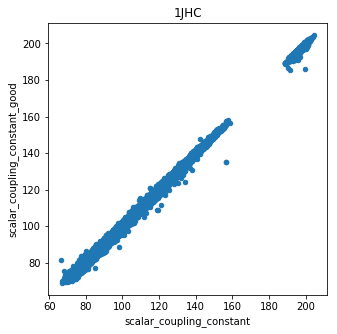

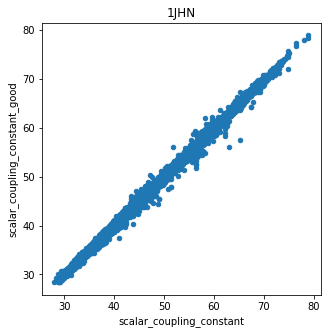

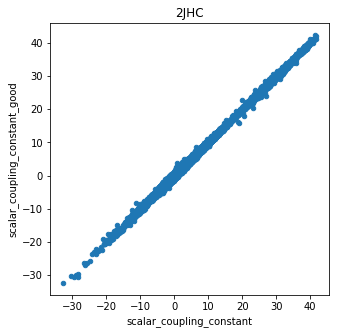

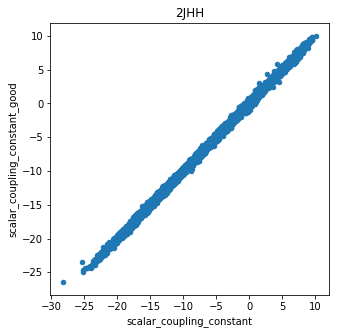

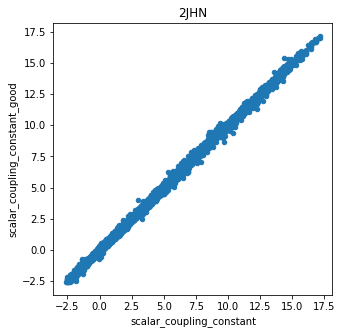

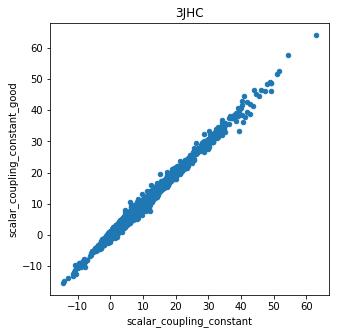

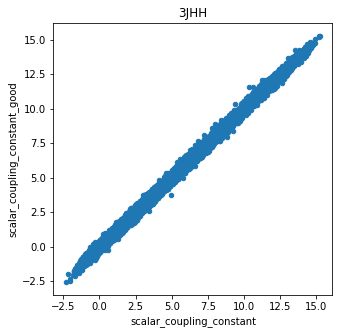

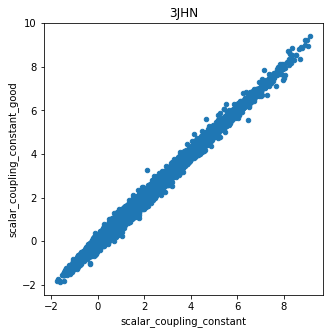

In [23]:
import matplotlib.pylab as plt
for i, d in ss.groupby('type'):
    d.plot(x='scalar_coupling_constant', y='scalar_coupling_constant_good', kind='scatter', figsize=(5, 5), title=i)
    plt.show()

In [24]:
ss[['id','scalar_coupling_constant']].to_csv('../submissions/BLEND003-CV-1.4572_Jul6best.csv', index=False)

In [25]:
ss.head()

,id,type,scalar_coupling_constant,scalar_coupling_constant_good
0,4658147,2JHC,10.255468,8.873624
1,4658148,1JHC,156.287614,134.914493
2,4658149,3JHH,4.949016,3.716820
3,4658150,1JHC,156.287614,134.914493
4,4658151,2JHC,10.255468,8.873624
